In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

In [3]:
df=pd.read_csv(r'C:\Users\vivek\Downloads/petrol_consumption.csv')

In [4]:
#data exploration
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
df.shape

(48, 5)

In [6]:
#info the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [7]:
#cheak the null value
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

<AxesSubplot:>

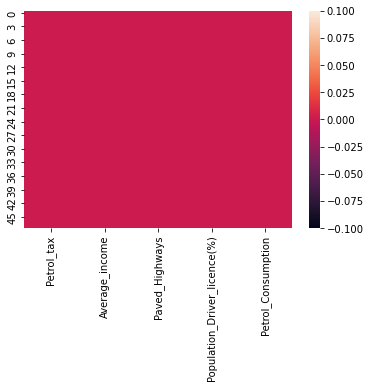

In [8]:
#heatmap
sns.heatmap(df.isnull())

In [9]:
#describe the data
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [10]:
df.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


<AxesSubplot:>

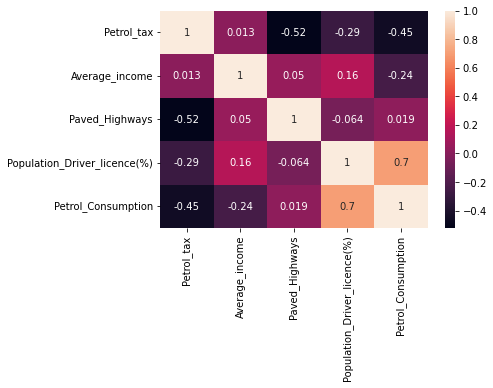

In [11]:
#heatmap
sns.heatmap(df.corr(),annot=True)

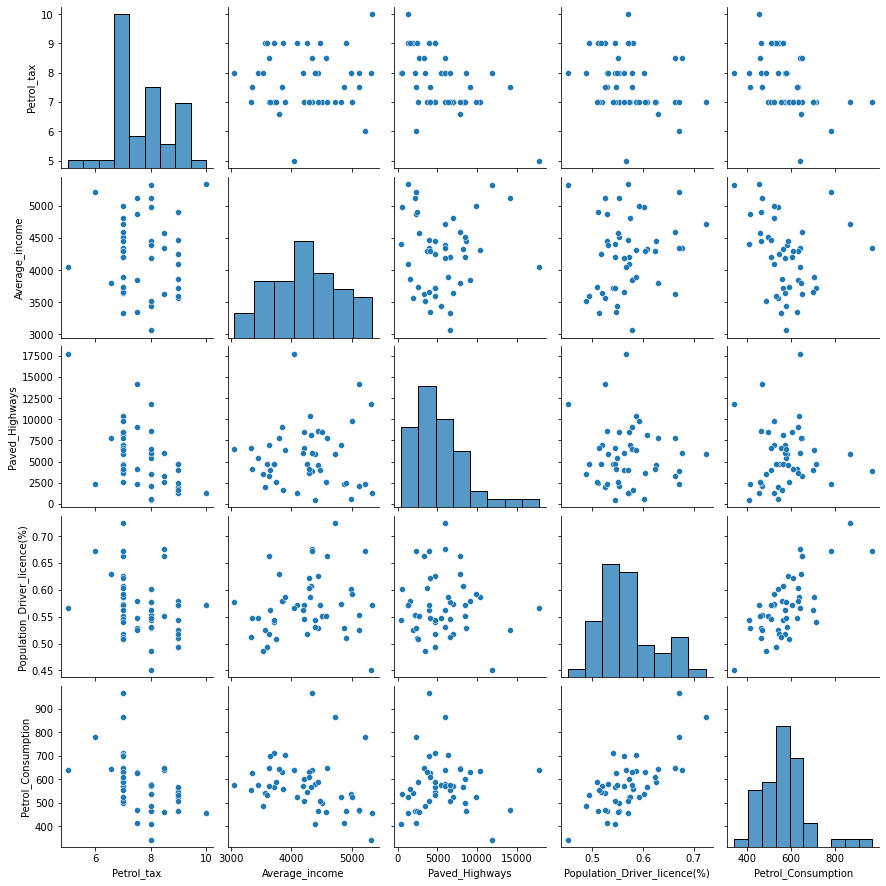

In [12]:
#Visualizing the Data
sns.pairplot(data=df)

C:\Users\vivek\anaconda3\1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Petrol_tax', ylabel='Density'>

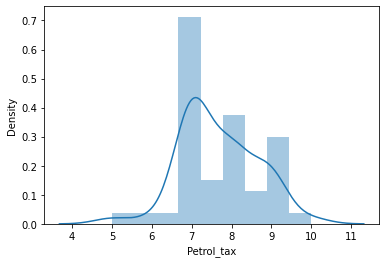

In [13]:
sns.distplot(df['Petrol_tax'])

In [14]:
X=df.drop(['Petrol_Consumption'],axis=1)

In [15]:
X.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [16]:
y=df.Petrol_Consumption


In [17]:
y

0     541
1     524
2     561
3     414
4     410
5     457
6     344
7     467
8     464
9     498
10    580
11    471
12    525
13    508
14    566
15    635
16    603
17    714
18    865
19    640
20    649
21    540
22    464
23    547
24    460
25    566
26    577
27    631
28    574
29    534
30    571
31    554
32    577
33    628
34    487
35    644
36    640
37    704
38    648
39    968
40    587
41    699
42    632
43    591
44    782
45    510
46    610
47    524
Name: Petrol_Consumption, dtype: int64

<AxesSubplot:>

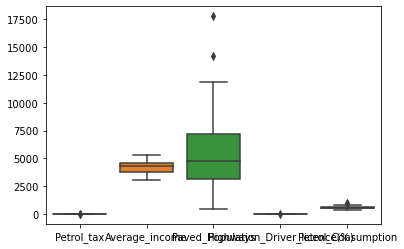

In [18]:
#boxplot
sns.boxplot(data=df)

In [37]:
# Dividing Data into Train and Test Sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)
from sklearn.linear_model import LinearRegression

In [38]:
lr=LinearRegression()

In [39]:
lr

LinearRegression()

In [40]:
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
lr.coef_

array([-2.41967838e+01, -8.16802995e-02, -5.22414056e-04,  1.32467546e+03])

In [43]:
pred=lr.predict(X_test)

In [44]:
pred

array([643.17663907, 411.95091293, 683.71276242, 728.04952172,
       755.47380147, 559.13513177, 671.91647367, 550.63355697,
       594.425464  , 525.03888267])

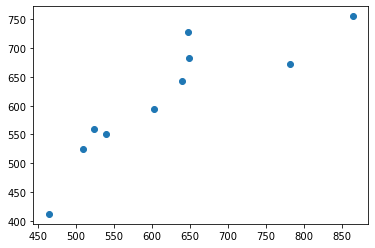

In [45]:
plt.scatter(y_test,pred)

In [46]:


q1 = X_train.quantile(q=0.25)
q3 = X_train.quantile(q=0.75)

IQR = X_train.apply(iqr)

minimum = X_train <(q1-1.5*IQR)
maximum = X_train >(q3+1.5*IQR)

In [47]:
filter = ~(minimum | maximum).any(axis=1) 

In [48]:
filter

43     True
7      True
40     True
3      True
39    False
14     True
25     True
15     True
24     True
41     True
37     True
42     True
26     True
10     True
30     True
32     True
35     True
2      True
27     True
47     True
34     True
33     True
8      True
19    False
29     True
12     True
5     False
0      True
28     True
4      True
13     True
9      True
46     True
23     True
6     False
17     True
11    False
31     True
dtype: bool

<AxesSubplot:>

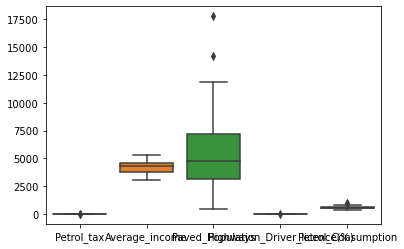

In [28]:
#boxplot
sns.boxplot(data=df)

In [29]:
# Removing Outliers with IQR Method
